# Sea ice imagery analysis
Alek Petty, Andrew Barrett, Xin Miao, Phil McDowell, Vivekanandan Balasubramanian

IPython Notebook to segment/classify sea ice images, as part of the XSEDE Polar Hackathon

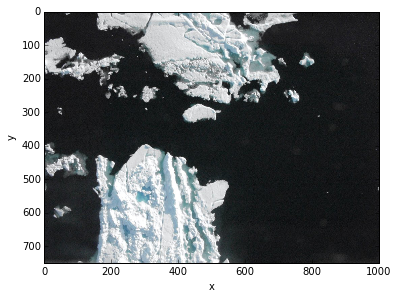

In [1]:
#%pylab notebook
%matplotlib inline
#import cv2
from scipy import misc
from pylab import *
from skimage.segmentation import mark_boundaries

filePath = "../../../DATA/IMAGERY/XIN/072610_00104.jpg"

img = misc.imread(filePath)
fig1 = figure(figsize=(6, 6))
xlabel('x')
ylabel('y')
imshow(img)
plt.show()

Testing out different scikit-learn (skimage) image classification functions   
Inspired by http://scikit-image.org/docs/dev/auto_examples/plot_segmentations.html

In [2]:
#We can also try the Gaussian Mixing Model (GMM) classification scheme
from sklearn import mixture
gmix = mixture.GMM(n_components=4, covariance_type='full')
#fit to image
gmix.fit(img.reshape((img.shape[0]*img.shape[1],3)))
#extract class means and cov
#this can be made a 'supervised' method by setting .means_ and .covars_ to mean/cov of samples
mean = gmix.means_
cov = gmix.covars_
#predict back to image
labeled_img = gmix.predict(img.reshape((img.shape[0]*img.shape[1],3))).reshape(img.shape[0],img.shape[1])

In [3]:
sort_indices = gmix.means_.argsort(axis = 0)
order = sort_indices[:, 0]
#print('\norder:', order)
gmix.means_ = gmix.means_[order,:]    
gmix.covars_ = gmix.covars_[order, :]
a=[gmix.weights_[x] for x in order]
gmix.weights_=a
gmix.means_
#print ("\n sorted gmix.covars \n", gmix.covars_) 
#print ("\n\nori gmix.weights \n", gmix.weights_)


array([[  23.25796661,   25.4644097 ,   27.04739557],
       [  83.49054928,   94.72744401,   96.657092  ],
       [ 171.38508198,  187.25801916,  195.24086195],
       [ 216.31966942,  217.80952244,  219.70688668]])

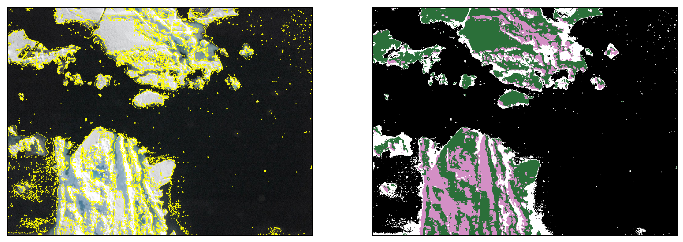

In [4]:
fig2, ax = plt.subplots(1, 2, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'}, 
                        figsize=(12, 6))
ax[0].imshow(mark_boundaries(img, labeled_img))
ax[1].imshow(labeled_img, cm.cubehelix)
for a in ax:
    a.set_xticks(())
    a.set_yticks(())
plt.show()

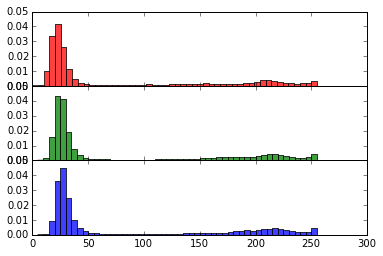

In [5]:
#print img[:,:,0].min(), img[:,:,0].max(), img[:,:,0].mean()
x0 = img[:,:,0].flatten()
x1 = img[:,:,1].flatten()
x2 = img[:,:,2].flatten()
fig5, ax = plt.subplots(3, sharex=True, sharey=True)
n0, bins0, patches0 = ax[0].hist(x0, bins=50, normed=1, facecolor='red', alpha=0.75)
n1, bins1, patches1 = ax[1].hist(x1, bins=50, normed=1, facecolor='green', alpha=0.75)
n2, bins2, patches2 = ax[2].hist(x2, bins=50, normed=1, facecolor='blue', alpha=0.75)
for a in ax:
    a.set_ylim(0, 0.05)
fig5.subplots_adjust(hspace=0)
plt.show()

Let's use the analysis from the previous image (generated using unsupervised GMM learning) to supervise the analysis of another sea ice image... 

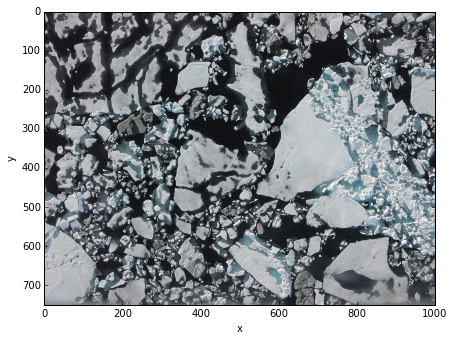

In [6]:
filePath2 = "../../../DATA/IMAGERY/XIN/072610_00211.jpg"

img2 = misc.imread(filePath2)
fig6 = figure(figsize=(7, 6))
xlabel('x')
ylabel('y')
imshow(img2)
plt.show()

In [7]:
labeled_img6 = gmix.predict(img2.reshape((img2.shape[0]*img2.shape[1],3))). \
    reshape(img2.shape[0],img2.shape[1])

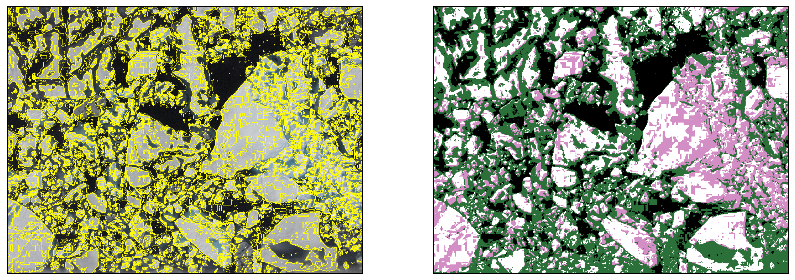

In [8]:
fig7, ax = plt.subplots(1, 2, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'}, 
                        figsize=(14, 6))
ax[0].imshow(mark_boundaries(img2, labeled_img6))
ax[1].imshow(labeled_img6, cmap=cm.cubehelix)
for a in ax:
    a.set_xticks(())
    a.set_yticks(())
plt.show()

Train the algorithm (GMM) with a number of images 

In [9]:
from glob import glob
files=glob("../../../DATA/IMAGERY/XIN/TRAINING/*.jpg")
imgAll = misc.imread(files[0]).reshape((-1, 3))
print size(files)
iterfiles = iter(files)
next(iterfiles)
num_files=3
print num_files
for file in files[0:num_files]:
    imgT = misc.imread(file).reshape((-1, 3))
    imgAll=np.concatenate((imgT, imgAll))
imgAll.shape
#img1 = misc.imread(files[0])
#img2 = misc.imread(files[1])

12
3


(3000000, 3)

In [10]:
gmixAll = mixture.GMM(n_components=4, covariance_type='full')
gmixAll.fit(imgAll)
#extract class means and cov
#this can be made a 'supervised' method by setting .means_ and .covars_ to mean/cov of samples
mean2 = gmixAll.means_
cov2 = gmixAll.covars_

In [11]:
print mean
sort_indicesAll = gmixAll.means_.argsort(axis = 0)
orderAll = sort_indicesAll[:, 0]
#print('\norder:', order)
gmixAll.means_ = gmixAll.means_[orderAll,:]    
gmixAll.covars_ = gmix.covars_[orderAll, :]
aAll = gmixAll.means_[orderAll,:]
aAll=[gmixAll.weights_[x] for x in orderAll]
gmixAll.weights_=aAll


[[  23.25796661   25.4644097    27.04739557]
 [ 216.31966942  217.80952244  219.70688668]
 [ 171.38508198  187.25801916  195.24086195]
 [  83.49054928   94.72744401   96.657092  ]]


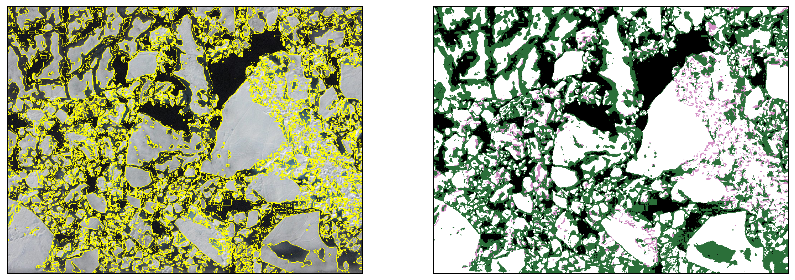

In [12]:
labeled_img7 = gmixAll.predict(img2.reshape((-1,3))). \
    reshape(img2.shape[0],img2.shape[1])
fig8, ax = plt.subplots(1, 2, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'}, 
                        figsize=(14, 6))
ax[0].imshow(mark_boundaries(img2, labeled_img7))
ax[1].imshow(labeled_img7, cmap=cm.cubehelix)
for a in ax:
    a.set_xticks(())
    a.set_yticks(())
plt.show()

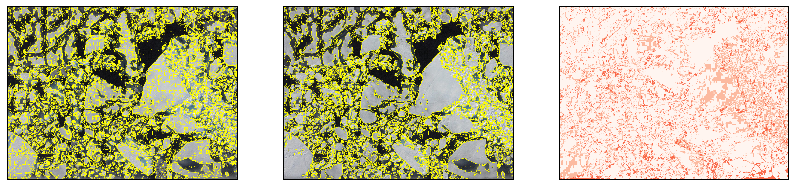

In [13]:

fig9, ax = plt.subplots(1, 3, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'}, 
                        figsize=(14, 6))
ax[0].imshow(mark_boundaries(img2, labeled_img6))
ax[1].imshow(mark_boundaries(img2, labeled_img7))
ax[2].imshow(labeled_img7-labeled_img6, cmap=cm.Reds, vmin=0, vmax=4)
for a in ax:
    a.set_xticks(())
    a.set_yticks(())
plt.show()

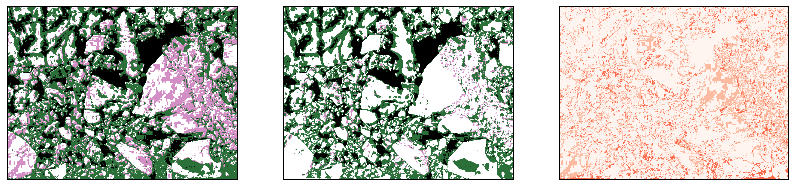

In [14]:
fig9, ax = plt.subplots(1, 3, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'}, 
                        figsize=(14, 6))
ax[0].imshow(labeled_img6, cmap=cm.cubehelix)
ax[1].imshow(labeled_img7, cmap=cm.cubehelix)
ax[2].imshow(labeled_img7-labeled_img6, cmap=cm.Reds, vmin=0, vmax=4)
for a in ax:
    a.set_xticks(())
    a.set_yticks(())
plt.show()

In [15]:
labeled_img7

array([[1, 1, 0, ..., 3, 3, 3],
       [1, 1, 1, ..., 3, 3, 3],
       [1, 1, 1, ..., 3, 3, 3],
       ..., 
       [3, 3, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 1, 1, 1]])

In [16]:
#test which is best - trained with one other image, multiple other images, or a supervised dataset.
# how to judge? Manually selecting I guess..